In [1]:
import numpy as np
import pandas as pd

In [2]:
train_pd = pd.read_csv(r'S:\Coursera\Введение в машинное обучение\Неделя 5\Boosting\gbm-data.csv', header=0)
train_pd

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = np.genfromtxt(r'S:\Coursera\Введение в машинное обучение\Неделя 5\Boosting\gbm-data.csv', delimiter=',', skip_header=1)
train

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
X = train[:, 1:]
y = train[:, 0]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
lr = [1, 0.5, 0.3, 0.2, 0.1]
arr_train = []
arr_test = []
for i in lr:
    gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=i)
    gbc.fit(X_train, y_train)
    arr_train.append(log_loss(y_train, gbc.predict_proba(X_train)))
    arr_test.append(log_loss(y_test, gbc.predict_proba(X_test)))
arr_train

      Iter       Train Loss   Remaining Time 
         1           1.0190            8.22s
         2           0.9192            8.06s
         3           0.8272            8.07s
         4           0.7834            8.06s
         5           0.7109            7.99s
         6           0.6368            7.97s
         7           0.5797            7.99s
         8           0.5610            7.99s
         9           0.5185            7.93s
        10           0.4984            7.87s
        20           0.1999            7.34s
        30           0.1313            6.96s
        40           0.0790            6.63s
        50           0.0511            6.30s
        60           0.0352            5.98s
        70           0.0245            5.67s
        80           0.0162            5.35s
        90           0.0114            5.04s
       100           0.0077            4.72s
       200           0.0002            1.56s
      Iter       Train Loss   Remaining Time 
        

[1.7088258292514425e-05,
 0.0010223231814672734,
 0.008829670224905706,
 0.024906124477548815,
 0.08936962416274086]

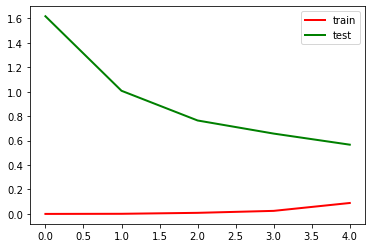

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(arr_train, 'r', linewidth=2)
plt.plot(arr_test, 'g', linewidth=2)
plt.legend(['train', 'test'])

In [21]:
arr_train_staged = []
arr_test_staged = []
gbc = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=0.2)
gbc.fit(X_train, y_train)


      Iter       Train Loss   Remaining Time 
         1           1.2613            8.22s
         2           1.1715            8.06s
         3           1.1009            7.91s
         4           1.0529            7.81s
         5           1.0130            7.79s
         6           0.9740            7.73s
         7           0.9475            7.67s
         8           0.9197            7.69s
         9           0.8979            7.66s
        10           0.8730            7.66s
        20           0.7207            7.26s
        30           0.6055            6.88s
        40           0.5244            6.57s
        50           0.4501            6.26s
        60           0.3908            5.93s
        70           0.3372            5.60s
        80           0.3009            5.28s
        90           0.2603            4.97s
       100           0.2327            4.65s
       200           0.0835            1.55s


<generator object GradientBoostingClassifier.staged_decision_function at 0x0000014D55B06F20>

In [24]:
gbc.predict_proba(X_test)

array([[0.0383748 , 0.9616252 ],
       [0.90001341, 0.09998659],
       [0.58939795, 0.41060205],
       ...,
       [0.4355796 , 0.5644204 ],
       [0.92950013, 0.07049987],
       [0.00804459, 0.99195541]])

In [9]:
def learn(learning_rate, X_train, y_train, X_test, y_test):
    model = GradientBoostingClassifier(
        n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    model.fit(X_train, y_train)
    
    test_score = list(range(250))
    train_score = list(range(250))

    for i, predictions in enumerate(model.staged_decision_function(X_test)):
        predictions = [x[0] for x in predictions.tolist()] # unpack this stupid format
        predictions = [1/(1 + math.exp(-x)) for x in predictions]
        test_score[i] = log_loss(y_test, predictions)

    for i, predictions in enumerate(model.staged_decision_function(X_train)):
        predictions = [x[0] for x in predictions.tolist()] # unpack this stupid format
        predictions = [1/(1 + math.exp(-x)) for x in predictions]
        train_score[i] = log_loss(y_train, predictions)

    plt.figure()
    plt.plot(test_score, 'r', linewidth=2)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

    return train_score, test_score

      Iter       Train Loss   Remaining Time 
         1           1.0190            8.22s
         2           0.9192            8.06s
         3           0.8272            7.91s
         4           0.7834            7.87s
         5           0.7109            7.79s
         6           0.6368            7.73s
         7           0.5797            7.71s
         8           0.5610            7.65s
         9           0.5185            7.61s
        10           0.4984            7.59s
        20           0.1999            7.18s
        30           0.1313            6.88s
        40           0.0790            6.61s
        50           0.0511            6.29s
        60           0.0352            5.95s
        70           0.0245            5.62s
        80           0.0162            5.30s
        90           0.0114            4.98s
       100           0.0077            4.66s
       200           0.0002            1.54s


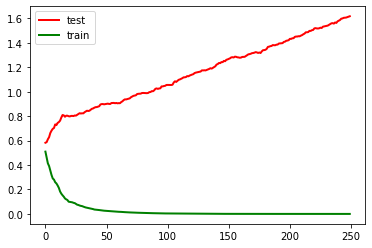

      Iter       Train Loss   Remaining Time 
         1           1.1255            7.72s
         2           1.0035            7.69s
         3           0.9386            7.66s
         4           0.8844            7.63s
         5           0.8381            7.55s
         6           0.7995            7.53s
         7           0.7559            7.57s
         8           0.7205            7.59s
         9           0.6958            7.55s
        10           0.6725            7.51s
        20           0.4672            7.13s
        30           0.3179            6.79s
        40           0.2274            6.47s
        50           0.1774            6.17s
        60           0.1394            5.86s
        70           0.1050            5.56s
        80           0.0805            5.25s
        90           0.0650            4.95s
       100           0.0511            4.64s
       200           0.0058            1.54s


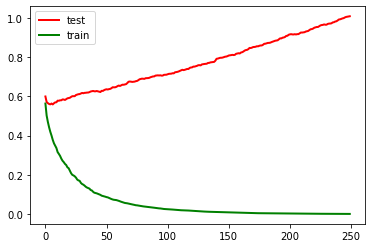

      Iter       Train Loss   Remaining Time 
         1           1.2095            8.47s
         2           1.1006            8.43s
         3           1.0240            8.24s
         4           0.9729            8.12s
         5           0.9387            8.04s
         6           0.8948            8.05s
         7           0.8621            8.06s
         8           0.8360            8.02s
         9           0.8171            7.95s
        10           0.7883            7.87s
        20           0.6029            7.35s
        30           0.4760            7.00s
        40           0.3879            6.65s
        50           0.3325            6.31s
        60           0.2759            5.98s
        70           0.2304            5.66s
        80           0.1969            5.35s
        90           0.1718            5.03s
       100           0.1404            4.72s
       200           0.0358            1.56s


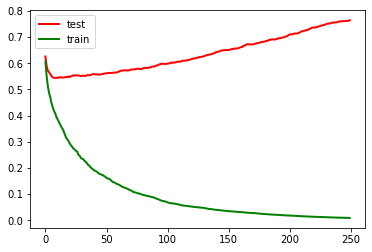

      Iter       Train Loss   Remaining Time 
         1           1.2613            7.97s
         2           1.1715            7.94s
         3           1.1009            7.82s
         4           1.0529            7.75s
         5           1.0130            7.69s
         6           0.9740            7.61s
         7           0.9475            7.60s
         8           0.9197            7.56s
         9           0.8979            7.53s
        10           0.8730            7.47s
        20           0.7207            7.11s
        30           0.6055            6.80s
        40           0.5244            6.48s
        50           0.4501            6.17s
        60           0.3908            5.86s
        70           0.3372            5.55s
        80           0.3009            5.24s
        90           0.2603            4.92s
       100           0.2327            4.62s
       200           0.0835            1.53s


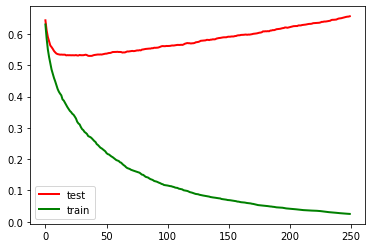

      Iter       Train Loss   Remaining Time 
         1           1.3199            7.97s
         2           1.2645            7.81s
         3           1.2170            7.82s
         4           1.1775            7.75s
         5           1.1404            7.69s
         6           1.1106            7.65s
         7           1.0844            7.64s
         8           1.0617            7.59s
         9           1.0411            7.53s
        10           1.0223            7.49s
        20           0.8864            7.12s
        30           0.7844            6.78s
        40           0.7176            6.47s
        50           0.6590            6.16s
        60           0.6120            5.85s
        70           0.5599            5.54s
        80           0.5242            5.23s
        90           0.4829            4.92s
       100           0.4473            4.61s
       200           0.2379            1.53s


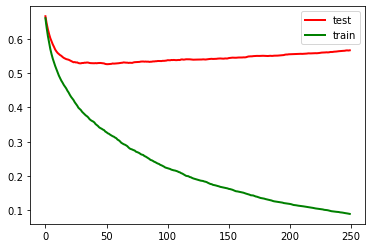

In [16]:
lr = [1, 0.5, 0.3, 0.2, 0.1]

for i in lr:
    learn(learning_rate=i, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


 Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [21]:
model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=0.2)
model.fit(X_train, y_train)
    
test_score = list(range(250))

for i, predictions in enumerate(model.staged_decision_function(X_test)):
    predictions = [x[0] for x in predictions.tolist()] # unpack this stupid format
    predictions = [1/(1 + math.exp(-x)) for x in predictions]
    test_score[i] = log_loss(y_test, predictions)

      Iter       Train Loss   Remaining Time 
         1           1.2613            8.22s
         2           1.1715            7.94s
         3           1.1009            7.82s
         4           1.0529            7.75s
         5           1.0130            7.69s
         6           0.9740            7.69s
         7           0.9475            7.67s
         8           0.9197            7.65s
         9           0.8979            7.61s
        10           0.8730            7.56s
        20           0.7207            7.18s
        30           0.6055            6.83s
        40           0.5244            6.52s
        50           0.4501            6.21s
        60           0.3908            5.91s
        70           0.3372            5.59s
        80           0.3009            5.28s
        90           0.2603            4.96s
       100           0.2327            4.65s
       200           0.0835            1.54s


In [22]:
for i in enumerate(test_score):
    print(i)

(0, 0.6440178252532975)
(1, 0.6116804536918495)
(2, 0.5904839372496186)
(3, 0.5767364515122595)
(4, 0.5634637754160209)
(5, 0.558570551954361)
(6, 0.5527472210128039)
(7, 0.546094123164476)
(8, 0.5415196492514055)
(9, 0.5377396014457767)
(10, 0.5359827238623724)
(11, 0.5350036844397639)
(12, 0.5341971667190248)
(13, 0.5344814545808215)
(14, 0.5340773602375849)
(15, 0.5340335009618385)
(16, 0.5341327854887927)
(17, 0.5319491027486606)
(18, 0.5325951966608586)
(19, 0.5323097278464514)
(20, 0.5324819133507445)
(21, 0.5321292404919267)
(22, 0.5323336458788014)
(23, 0.5321364516026601)
(24, 0.5320688304902977)
(25, 0.5328616639175239)
(26, 0.5316190377859967)
(27, 0.5315205548918214)
(28, 0.5332204016163479)
(29, 0.5323861247369267)
(30, 0.5322969616176372)
(31, 0.5324318559617608)
(32, 0.5331971336211693)
(33, 0.5340457283375767)
(34, 0.5326867101603974)
(35, 0.530485620894695)
(36, 0.5301645204906471)
(37, 0.5304517952627301)
(38, 0.5304015466819089)
(39, 0.5319713162231164)
(40, 0.533083

In [26]:
print(min(enumerate(test_score), key = lambda x: x[1]))

(36, 0.5301645204906471)


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_2 = RandomForestClassifier(n_estimators=36, verbose=True, random_state=241)
model_2.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=36, random_state=241, verbose=True)

In [32]:
predictions = model_2.predict_proba(X_test)
test_score = log_loss(y_test, predictions)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


In [33]:
test_score

0.5415685811957381